In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-fp-converge)

We revisit {numref}`Demo %s <demo-fp-spiral>` and investigate the observed convergence more closely. Recall that above we calculated $g'(p)\approx-0.42$ at the convergent fixed point.

In [2]:
f = poly1d([1, -4, 3.5])
r = f.roots
print(r)

[2.70710678 1.29289322]


Here is the fixed-point iteration. This time we keep track of the whole sequence of approximations.

In [3]:
g = lambda x: x - f(x)
x = zeros(12)
x[0] = 2.1
for k in range(11):
    x[k + 1] = g(x[k])

print(x)

[2.1        2.59       2.7419     2.69148439 2.71333373 2.70448872
 2.70818436 2.70665927 2.70729195 2.70703005 2.70713856 2.70709362]


It's illuminating to construct and plot the sequence of errors.

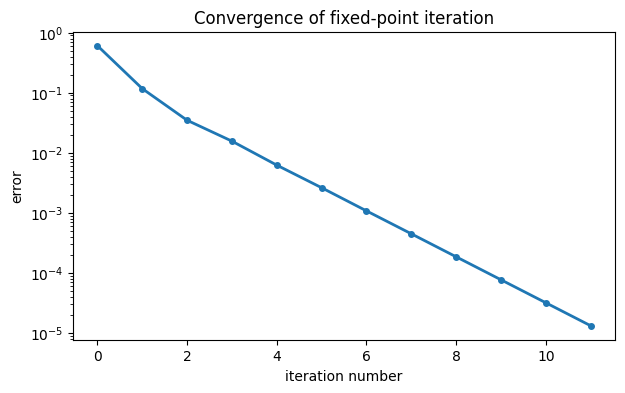

In [4]:
err = abs(x - max(r))
semilogy(err, "-o")
xlabel("iteration number"), ylabel("error")
title("Convergence of fixed-point iteration");

It's quite clear that the convergence quickly settles into a linear rate. We could estimate this rate by doing a least-squares fit to a straight line. Keep in mind that the values for small $k$ should be left out of the computation, as they don't represent the linear trend.

In [5]:
p = polyfit(arange(5, 13), log(err[4:]), 1)
print(p)

[-0.88071816 -0.66805739]


We can exponentiate the slope to get the convergence constant $\sigma$.

In [6]:
print("sigma:", exp(p[0]))

sigma: 0.4144851385485472


The error should therefore decrease by a factor of $\sigma$ at each iteration. We can check this easily from the observed data.

In [7]:
err[8:] / err[7:-1]

array([0.41376605, 0.41439873, 0.41413683, 0.41424534])

The methods for finding $\sigma$ agree well.